In [1]:
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

In [2]:
data_file = r'breast_cancer_data/wdbc.data'
data = []
with open(data_file) as fp:
    data = fp.readlines()
    data = [x.replace('\n', '') for x in data]
"Data points: ", len(data)

('Data points: ', 569)

In [3]:
import pandas as pd
df = pd.DataFrame(data)
df = df[0].str.split(",",expand=True) 

known_cols = ('ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
              'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 
              'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 
              'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 
              'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
              'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 
              'fractal_dimension_worst')
df.columns = known_cols

df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
2,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
4,84358402,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,...,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678


Convert known data types to numeric format.

In [4]:
# Convert data types to numeric
df[df.columns[~df.columns.isin(['Diagnosis'])]] = df[df.columns[~df.columns.isin(['Diagnosis'])]].apply(pd.to_numeric)

Check all the data types of the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Basics Statistics:
- Mean
- Count
- Standard deviation
- Minimum and maximum value
- Quantile

In [6]:
df.describe()

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.isnull().sum()

ID                         0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**There is no null/missing value in any column**

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

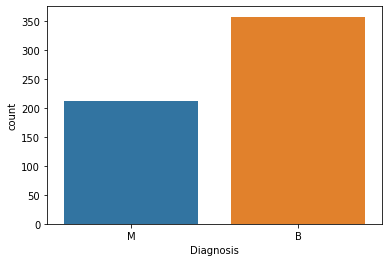

In [9]:
sns.countplot(x='Diagnosis', data=df)

- Data is bit imbalanced.
- 'malignant' are less in numbers as compared to 'benign' tumor
- Need oversampling of 'malignant'

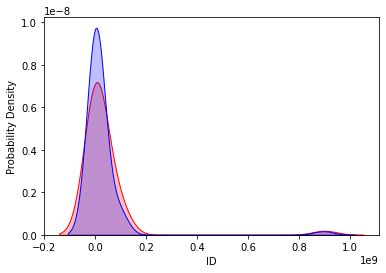

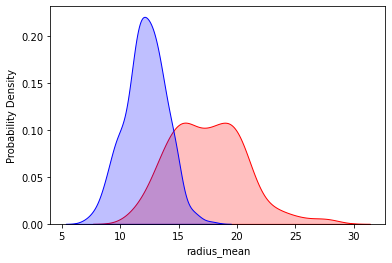

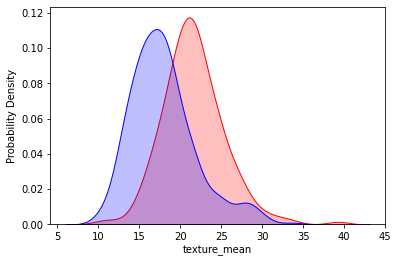

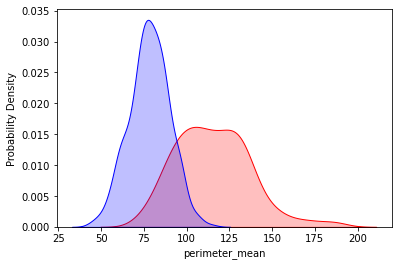

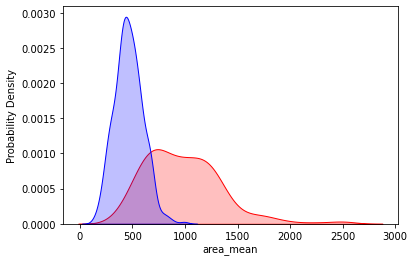

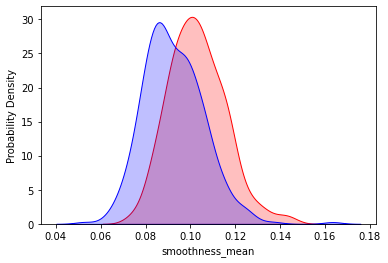

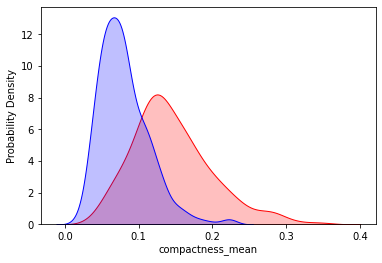

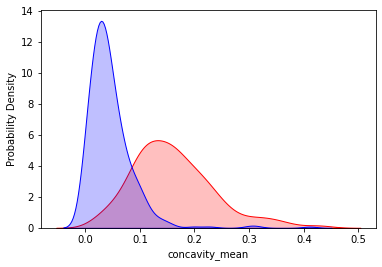

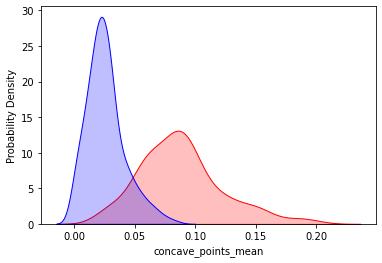

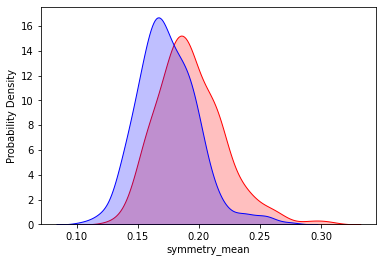

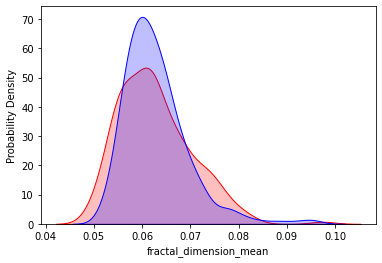

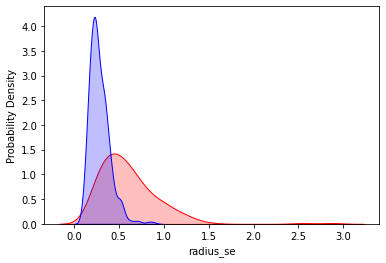

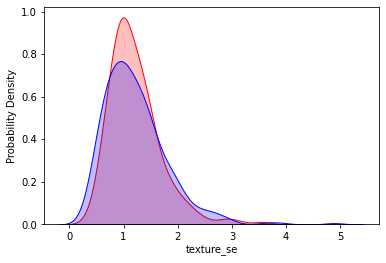

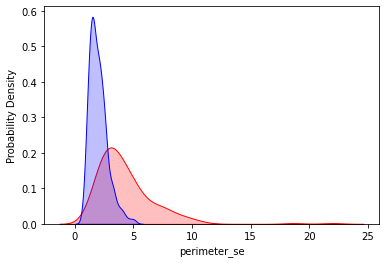

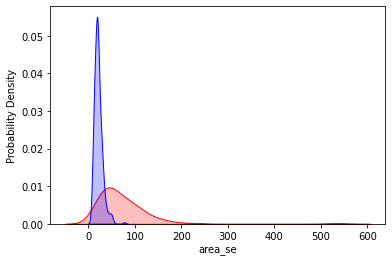

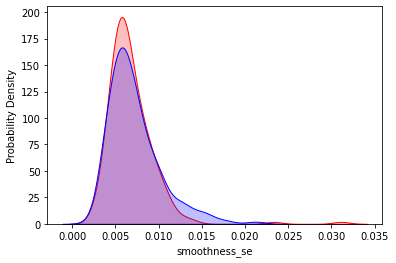

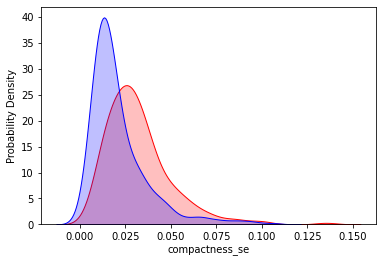

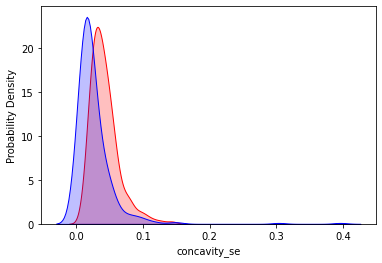

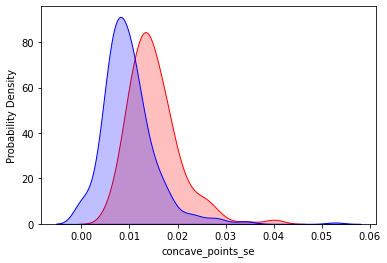

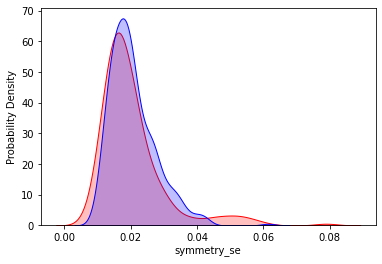

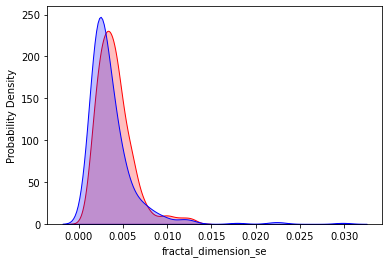

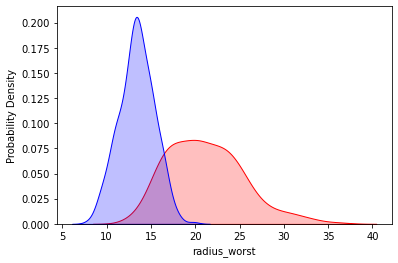

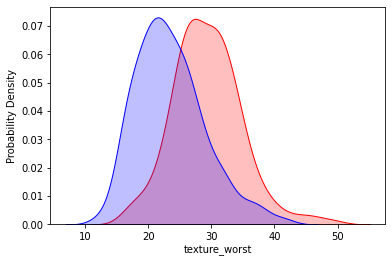

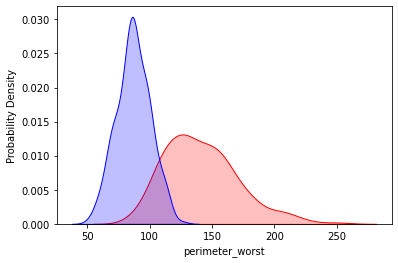

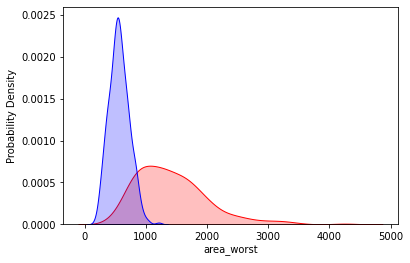

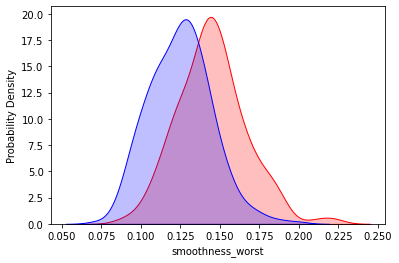

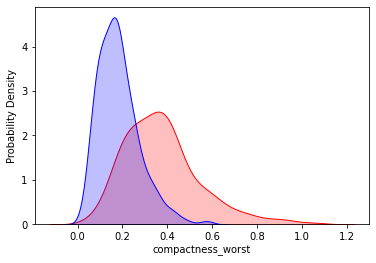

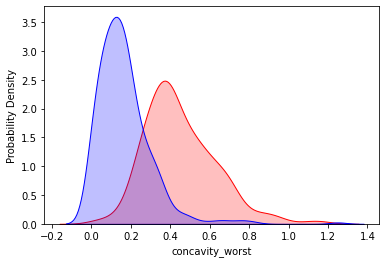

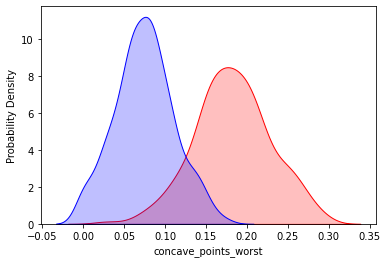

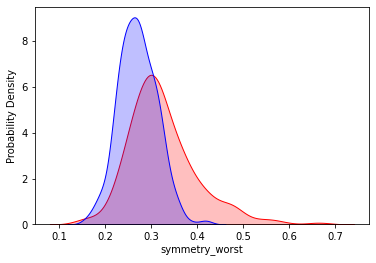

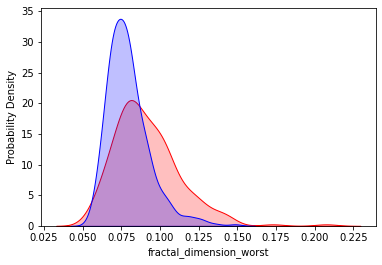

In [10]:
for col in list(df.columns):
# col = 'smoothness_worst'
    if col != 'Diagnosis':
        sns.kdeplot(df.loc[(df['Diagnosis']=='M'), col], color='r', shade=True, Label='M')
        sns.kdeplot(df.loc[(df['Diagnosis']=='B'), col], color='b', shade=True, Label='B')
        plt.xlabel(col)
        plt.ylabel('Probability Density')
        plt.show()

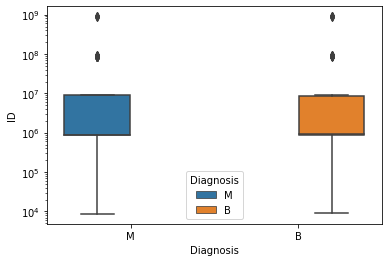

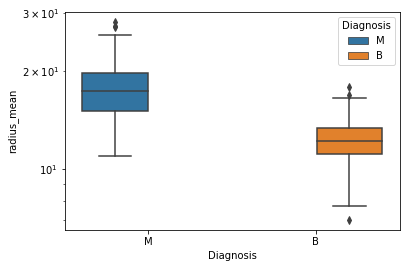

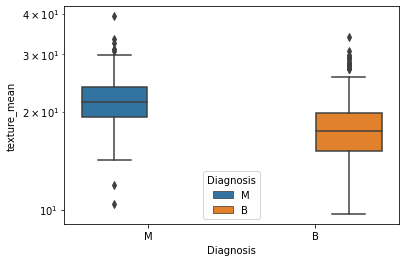

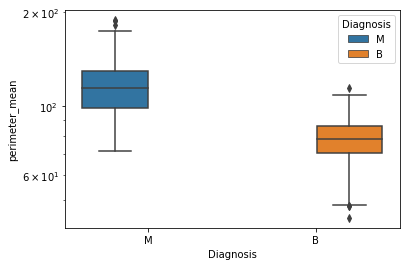

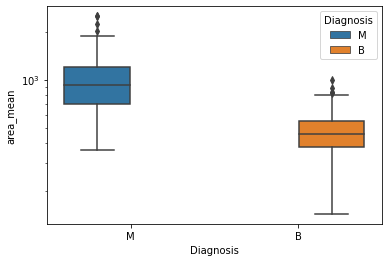

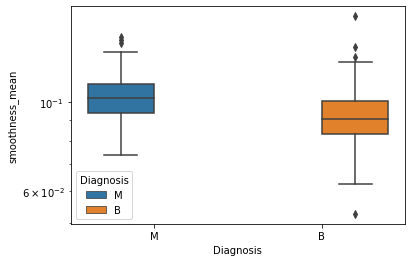

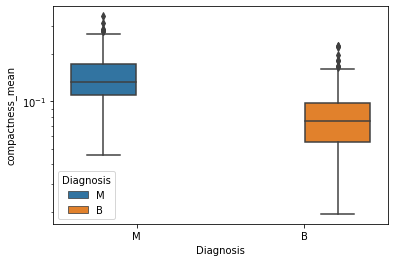

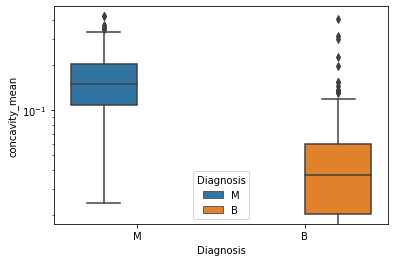

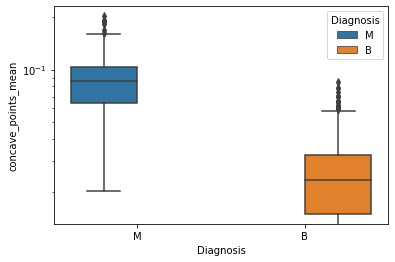

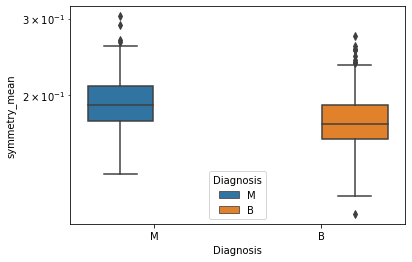

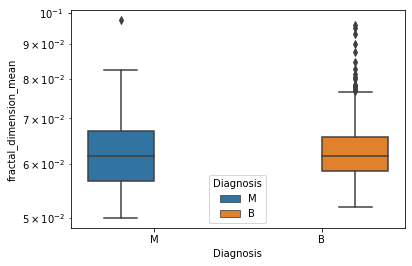

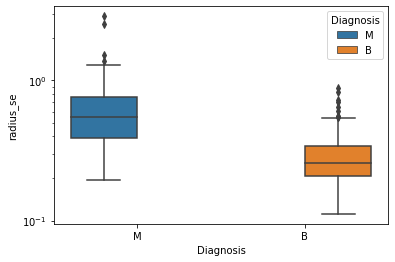

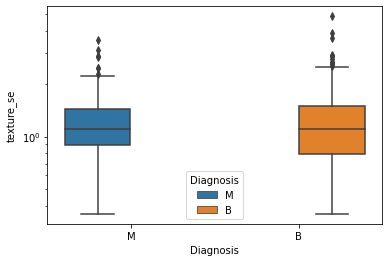

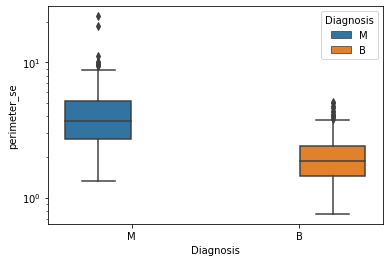

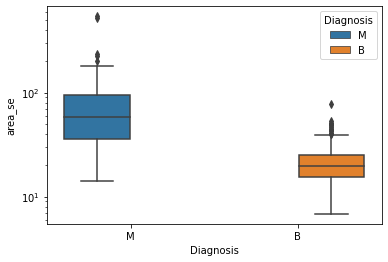

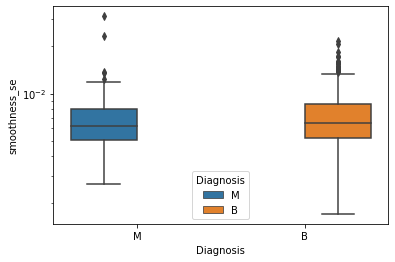

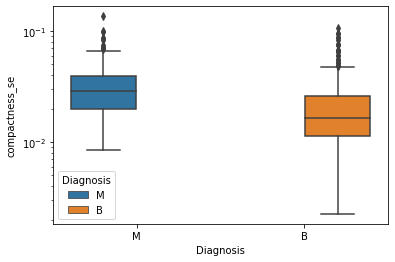

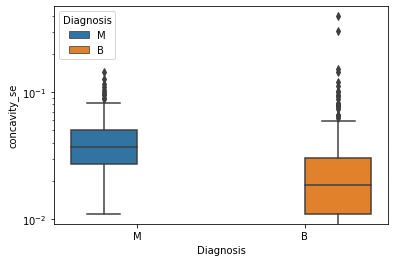

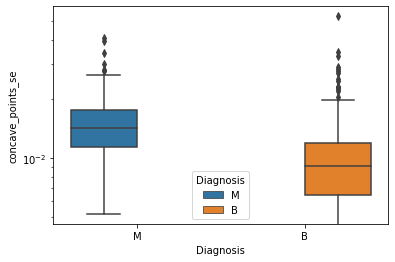

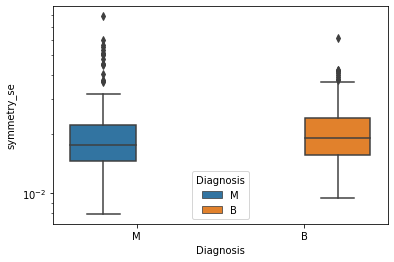

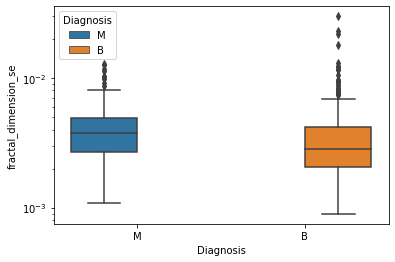

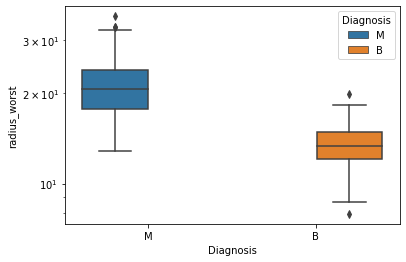

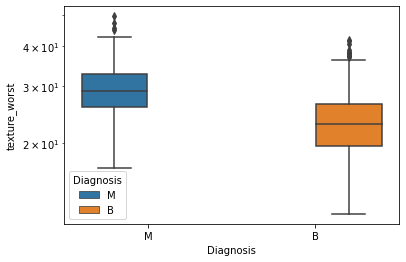

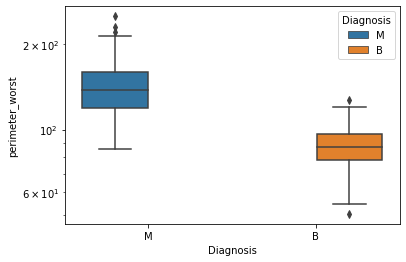

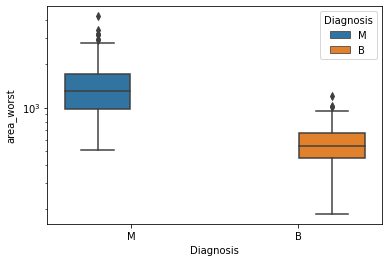

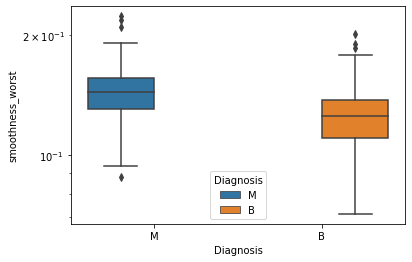

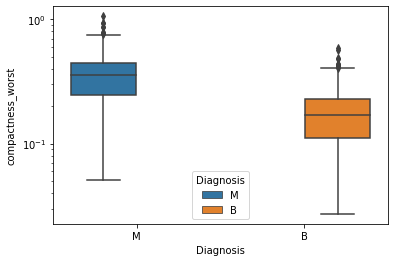

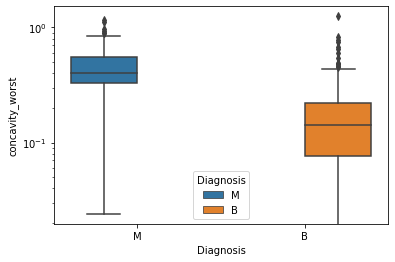

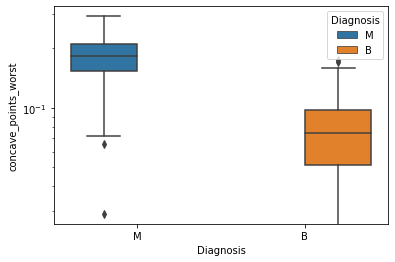

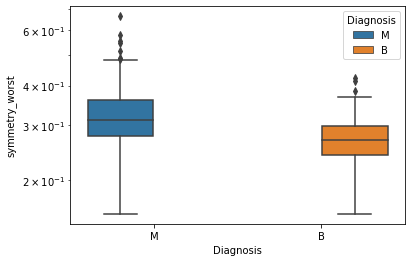

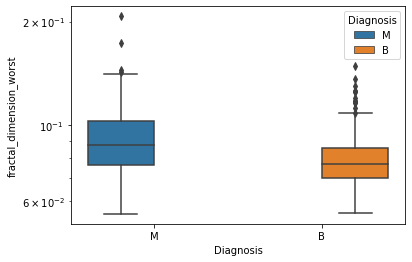

In [11]:
for col in list(df.columns):
# col = 'smoothness_worst'
    if col != 'Diagnosis':
        ax = sns.boxplot(x="Diagnosis", y=col, hue="Diagnosis", data=df)
        ax.set_yscale('log')
        plt.show()

Outliers can be seen in the columns but I can't remove or replace with mean/median.

<AxesSubplot:>

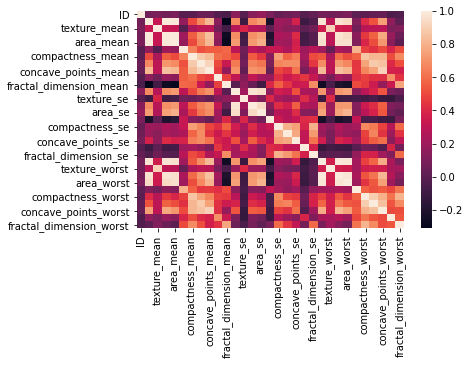

In [12]:
sns.heatmap(df.corr())

In [13]:
import numpy  as np 

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print('Columns to drop: ', to_drop)

df = df.loc[:, ~df.columns.isin(to_drop)]
df.shape

Columns to drop:  ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


(569, 25)

- Dropped columns such as:

- ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']

- Listed columns are highly co-related.


In [14]:
df.head()

,ID,Diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,concave_points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
X = df.loc[:, ~df.columns.isin(['ID', 'Diagnosis'])]
y = df['Diagnosis']
X.shape, y.shape

((569, 23), (569,))

- Oversample the minority class samples.

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample(X, y)
X.shape, y.shape

((714, 23), (714,))

In [17]:
# Convert target values to binaries

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

y = lb.fit_transform(y)
y.shape

(714, 1)

- Scale the values between 0 and 1 to keep all the values in the same unit.

In [18]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

- There are 32 columns in total. 
- After removing higly correlated features, it becomes 23 features in numbers.
- Applying dimension reduction and keeping 99% variance for the principal components, 23 dimension features transforms to 16 dimension features without losing any accuracy.

In [19]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99) ## Select Principal components having 99% Variance
X = pca.fit_transform(X)
print('explained_variance_ratio_: ', pca.explained_variance_ratio_)
X.shape

explained_variance_ratio_:  [0.52455273 0.13833053 0.08547814 0.07658765 0.04570925 0.03883064
 0.01599874 0.01209641 0.01149948 0.01042251 0.00859041 0.00773985
 0.00581345 0.00499585 0.00309457 0.0024843 ]


(714, 16)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  
                                                    stratify=y, random_state=42)
X_train.shape, X_test.shape

((642, 16), (72, 16))

Which classification methods are you using? How do you decide among different
methods?

- I would suggest Linear SVM or logistics Regression if I have numerical datasets and less number of samples

#### Find best parameter for Logistic Regression using GridSearchCV.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Find best hyperparameters (accuracy)
log_clf = LogisticRegression(random_state = 42)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf.fit(X_train, y_train)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The best parameters for using this model is {'C': 1000, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.2s finished


In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=100, penalty='l2')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

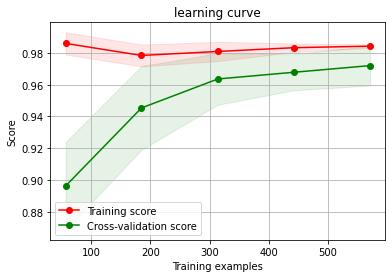

In [24]:
plot_learning_curve(estimator=model, title='learning curve', X=X, y=y, cv=5)

- Learning curve seems balancing. Neither overfit nor underfit is happening. 

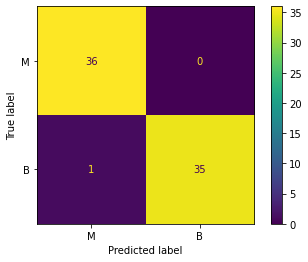

In [25]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, display_labels=['M', 'B'])

Confusion matrix tells that
- All maligants are correctly classified as maligants.
- Only 1 Benign is wrongly classified as Maligant.

I have applied Logistic Regression with best hyper parameters that gives 99% accuracy on test dataset.

Below you can see accuracy, precision and recall:

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy: {:2f} %'.format(accuracy_score(y_test, y_pred) * 100))
print('Precision: {:2f} %'.format(precision_score(y_test, y_pred) * 100))
print('Recall: {:2f} %'.format(recall_score(y_test, y_pred) * 100))

Accuracy: 98.611111 %
Precision: 100.000000 %
Recall: 97.222222 %


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.97      0.99        36

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



### Answers to the questions

Please explain eigen-vectors and eigen-values and their importance?

- Eigen-vectors and eigen values are computed using covariance matrix to determine principal components of the data.
- Every eigenvector has an eigenvalue and their number is equals to the number of dimensions of the data.

Which classification methods are you using? How do you decide among different
methods?

There is no accurate answer for this question. As per my knowledge,

- For numerical data sets and features are more than samples, then Linear SVM, logistics regression are recommended.
- For categorical data sets, Decision Tree and Random Forest works well. 
- For higher datasets, Neural Network performs well.

When do you consider adding the “regularization parameter” to the model? and
how it will help to improve the model performance?

- Adding/Increasing regularization parameter, model is miniming the loss error.

Please describe when to use logistic sigmoid, tanh, and Fourier as a basis function.

Sigmoid:
- It is S-shaped curve. Value is between 0 and 1.
- It is used for binary classfication.
- It predicts the probablity of the classes.

Tanh:
- tanh is also like logistic sigmoid but better. 
- The range of the tanh function is from (-1 to 1)